In [25]:
from tensorflow import keras
import tensorflow as tf
import pandas as pd 
import numpy as np

from sklearn import preprocessing
import matplotlib.pyplot as plt

# Normalizing only features 

In [2]:

(trainX,trainY),(testX,testY)=keras.datasets.boston_housing.load_data()

scaller=preprocessing.StandardScaler()
trainX=scaller.fit_transform(trainX)
testX=scaller.transform(testX)



In [26]:
tf.random.set_seed(25)

model=keras.Sequential()
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dense(1,activation='linear'))
model.compile(optimizer=keras.optimizers.Adam(0.001),loss=keras.losses.MSE,metrics=['mae'])

In [4]:
def scheduler(epoch,lr):
    if epoch>10 and epoch<=20:
        lr=0.001
    elif epoch>20:
        lr=0.0001
    return lr

In [5]:
history=model.fit(trainX,trainY,batch_size=1,epochs=20,validation_split=0.1)

Epoch 1/20

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

363/363 [==============================] - 0s 957us/step - loss: 189.8086 - mae: 9.6525 - val_loss: 19.0093 - val_mae: 3.5353
Epoch 2/20
363/363 [==============================] - 0s 611us/step - loss: 26.9947 - mae: 3.4716 - val_loss: 15.9192 - val_mae: 3.1136
Epoch 3/20
363/363 [==============================] - 0s 640us/step - loss: 19.2055 - mae: 3.0417 - val_loss: 14.2639 - val_mae: 3.0259
Epoch 4/20
363/363 [==============================] - 0s 629us/step - loss: 15.3541 - mae: 2.7325 -

In [6]:
predicted=model.predict(testX)
mse,mae=model.evaluate(testX,testY,batch_size=1)

102/102 [==============================] - 0s 558us/step - loss: 20.8220 - mae: 2.8897


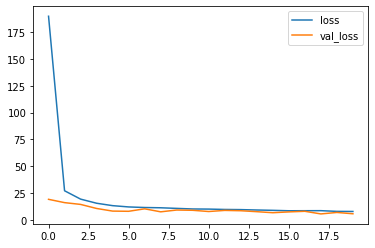

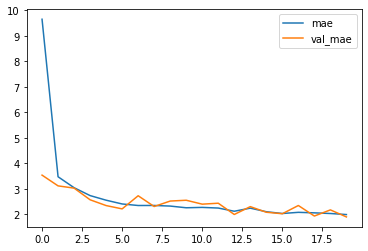

In [7]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()

plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.legend(['mae', 'val_mae'])
plt.show()

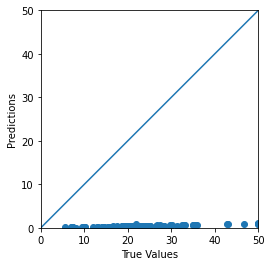

In [18]:
a = plt.axes(aspect='equal')
plt.scatter(testY, predicted)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

Epoch 1/19

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

363/363 [==============================] - 0s 729us/step - loss: 0.0406 - mae: 0.1268 - val_loss: 0.0087 - val_mae: 0.0801
Epoch 2/19
363/363 [==============================] - 0s 598us/step - loss: 0.0124 - mae: 0.0846 - val_loss: 0.0113 - val_mae: 0.0781
Epoch 3/19
363/363 [==============================] - 0s 605us/step - loss: 0.0126 - mae: 0.0760 - val_loss: 0.0080 - val_mae: 0.0756
Epoch 4/19
363/363 [==============================] - 0s 609us/step - loss: 0.0103 - mae: 0.0733 - val_los

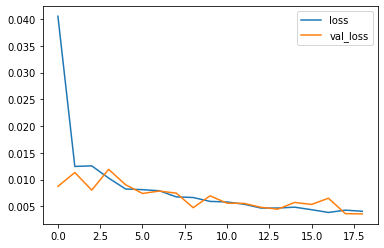

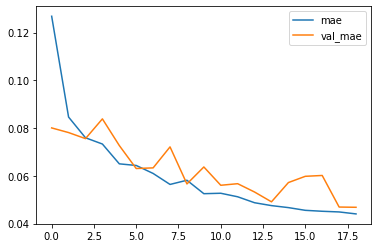

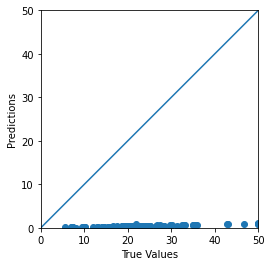

In [17]:
tf.random.set_seed(15)

model=keras.Sequential()
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dense(1,activation='linear'))
model.compile(optimizer=keras.optimizers.RMSprop(),loss=keras.losses.MSE,metrics=['mae'])
history=model.fit(trainX,trainY,batch_size=1,epochs=19,validation_split=0.1)
mse,mae=model.evaluate(testX,testY,batch_size=1)
predicted=model.predict(testX)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.legend(['mae', 'val_mae'])
plt.show()

a = plt.axes(aspect='equal')
plt.scatter(testY, predicted)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


# Normalizing features and target values 
## Less MAE AND MSE VALUE

In [11]:
(trainX,trainY),(testX,testY)=keras.datasets.boston_housing.load_data()

scaller=preprocessing.StandardScaler()
trainX=scaller.fit_transform(trainX)
testX=scaller.transform(testX)

scallerY=preprocessing.MinMaxScaler()
trainY=scallerY.fit_transform(trainY.reshape(-1,1))

Epoch 1/12

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

363/363 [==============================] - 0s 717us/step - loss: 0.0181 - mae: 0.0903 - val_loss: 0.0074 - val_mae: 0.0624
Epoch 2/12
363/363 [==============================] - 0s 637us/step - loss: 0.0089 - mae: 0.0654 - val_loss: 0.0070 - val_mae: 0.0610
Epoch 3/12
363/363 [==============================] - 0s 616us/step - loss: 0.0069 - mae: 0.0583 - val_loss: 0.0048 - val_mae: 0.0552
Epoch 4/12
363/363 [==============================] - 0s 616us/step - loss: 0.0057 - mae: 0.0531 - val_los

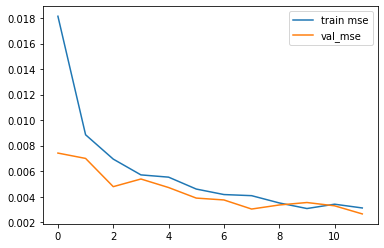

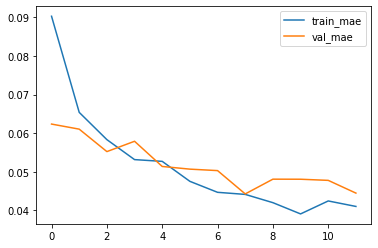

In [12]:
tf.random.set_seed(15)

model=keras.Sequential()
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dense(32,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))
model.compile(optimizer=keras.optimizers.Adam(0.001),loss=keras.losses.MSE,metrics=['mae'])
history=model.fit(trainX,trainY,batch_size=1,epochs=12,validation_split=0.1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train mse','val_mse'])
plt.show()

plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.legend(['train_mae','val_mae'])
plt.show()

mse:  11.739194
mae:  2.2995014


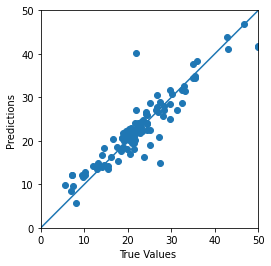

In [19]:
predicted=model.predict(testX)
print('mse: ',np.mean(keras.losses.mse(testY.reshape(-1,1),scallerY.inverse_transform(predicted))))
print('mae: ',np.mean(keras.losses.mae(testY.reshape(-1,1),scallerY.inverse_transform(predicted))))

a = plt.axes(aspect='equal')
plt.scatter(testY, scallerY.inverse_transform(predicted))
plt.xlabel('True Values ')
plt.ylabel('Predictions ')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


### Using K- flod validation 

In [33]:
(train_data,train_targets),(test_data,test_targets)=keras.datasets.boston_housing.load_data()

In [34]:
def plot(history):
    plt.figure(figsize = (20,10))
    
    plt.subplot(1, 2, 1)
    plt.plot(history['loss'], label = 'Training mse')
    plt.plot(history['val_loss'], label = 'Validation mse')
    plt.title('Training and validation mse')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history['mae'], label = 'Training mae')
    plt.plot(history['val_mae'], label = 'Validation mae')
    plt.title('Training and validation mae')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()
    

number of validation samples: 101
number of training samples: 404
processing fold # 0
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
4/4 [==============================] - 0s 636us/step - loss: 63.8008 - mae: 5.7394
processing fold # 1
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
4/4 [==============================] - 0s 658us/step - loss: 66.8919 - mae: 6.0355
processing fold # 2
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
4/4 [==============================] - 0s 548us/step - loss: 82.2725 - mae: 6.9983
processing fold # 3
-------------------------------------------------------------------------------------
---

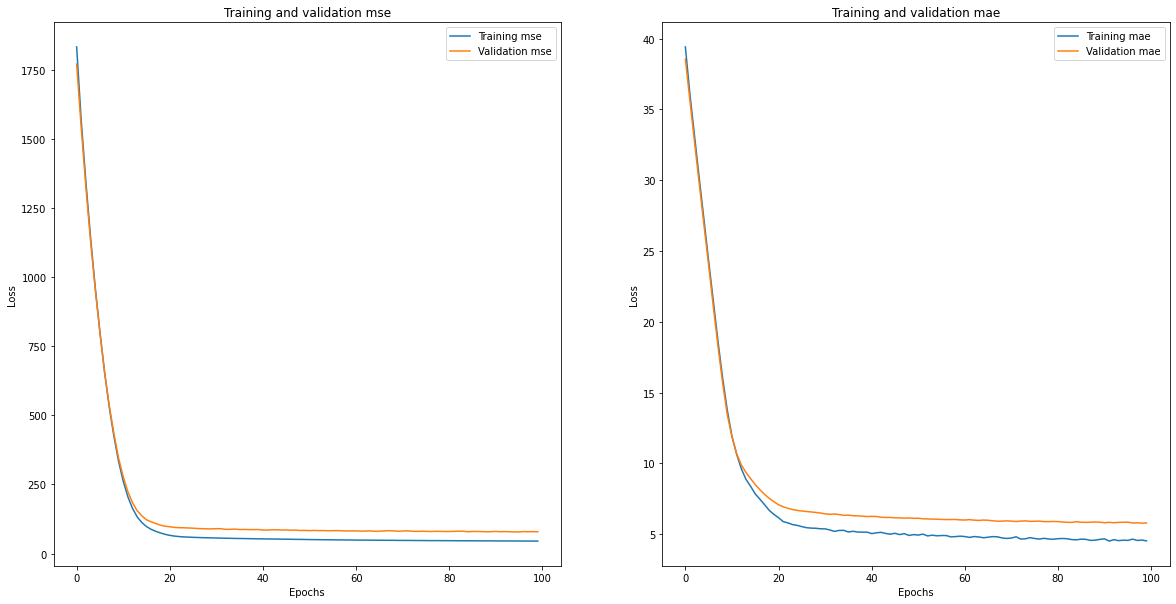

Mean Mae Score 5.852802634239197
Test mse Score: 67.4826307296753
Test_mae_Score 6.048742294311523


In [47]:

k = 4
num_val_samples = len(train_data) //k 
num_epochs = 100
all_scores = []
all_mae_histories = []
test_maes=[]
test_mses=[]
print("number of validation samples:", num_val_samples)
print("number of training samples:", len(train_data))

for i in range(k):
    print('processing fold #', i)
    print('-------------------------------------------------------------------------------------')
    print('-------------------------------------------------------------------------------------')
    #preparing validation data from partition k 
    val_data = train_data[i *num_val_samples:(i+1)*num_val_samples]
    val_target = train_targets[i*num_val_samples:(i+1) *num_val_samples]
    #preparing the training data from all other partitions 
    partial_train_data = np.concatenate([train_data[:i*num_val_samples], train_data[(i+1)*num_val_samples:]], axis = 0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i+1)*num_val_samples:]],axis = 0)
    model = keras.Sequential()
    model.add(keras.layers.Dense(64, activation = 'relu', input_shape=(train_data.shape[1],)))
    model.add(keras.layers.Dense(64,activation = 'relu'))
    model.add(keras.layers.Dense(1))
    model.compile(optimizer=keras.optimizers.RMSprop(lr = 0.00001), loss = 'mse', metrics =['mae'])
    history = model.fit(partial_train_data, partial_train_targets, epochs = num_epochs, batch_size =16
                        ,validation_data=(val_data,val_target),verbose = 0)
    val_mse, val_mae = model.evaluate(val_data, val_target, verbose=0)
    all_scores.append(val_mae)
    
    test_mse,test_mae=model.evaluate(test_data, test_targets)
    test_mses.append(test_mse)
    test_maes.append(test_mae)


plot(history.history)
print("Mean Mae Score",np.mean(all_scores))
    
#test_mse_score , test_mae_score = model.evaluate(test_data, test_targets)
print("Test mse Score:", np.mean(test_mses))
print("Test_mae_Score", np.mean(test_maes))

### Using k =3

number of validation samples: 134
number of training samples: 404
processing fold # 0
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
4/4 [==============================] - 0s 668us/step - loss: 58.8133 - mae: 5.5528
processing fold # 1
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
4/4 [==============================] - 0s 536us/step - loss: 60.5022 - mae: 5.8270
processing fold # 2
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
4/4 [==============================] - 0s 552us/step - loss: 53.9440 - mae: 5.1271


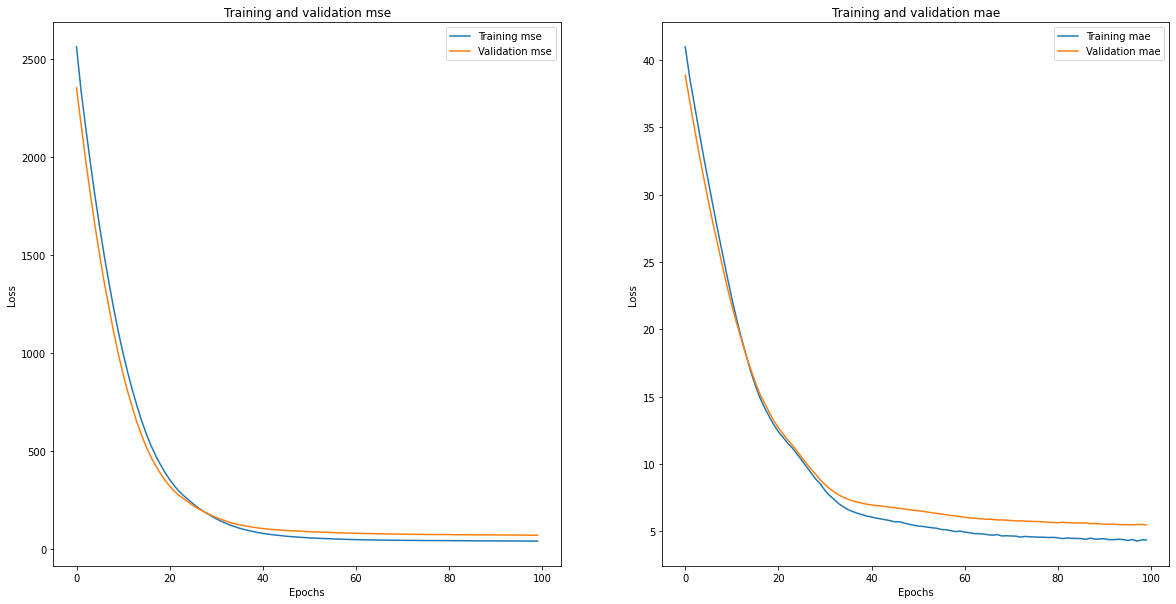

Mean Mae Score 5.132562001546224
Test mse Score: 57.75316619873047
Test_mae_Score 5.502302010854085


In [48]:
k = 3
num_val_samples = len(train_data) //k 
num_epochs = 100
all_scores = []
all_mae_histories = []
test_maes=[]
test_mses=[]
print("number of validation samples:", num_val_samples)
print("number of training samples:", len(train_data))

for i in range(k):
    print('processing fold #', i)
    print('-------------------------------------------------------------------------------------')
    print('-------------------------------------------------------------------------------------')
    #preparing validation data from partition k 
    val_data = train_data[i *num_val_samples:(i+1)*num_val_samples]
    val_target = train_targets[i*num_val_samples:(i+1) *num_val_samples]
    #preparing the training data from all other partitions 
    partial_train_data = np.concatenate([train_data[:i*num_val_samples], train_data[(i+1)*num_val_samples:]], axis = 0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i+1)*num_val_samples:]],axis = 0)
    model = keras.Sequential()
    model.add(keras.layers.Dense(64, activation = 'relu', input_shape=(train_data.shape[1],)))
    model.add(keras.layers.Dense(64,activation = 'relu'))
    model.add(keras.layers.Dense(1))
    model.compile(optimizer=keras.optimizers.RMSprop(lr = 0.00001), loss = 'mse', metrics =['mae'])
    history = model.fit(partial_train_data, partial_train_targets, epochs = num_epochs, batch_size =16
                        ,validation_data=(val_data,val_target),verbose = 0)
    val_mse, val_mae = model.evaluate(val_data, val_target, verbose=0)
    all_scores.append(val_mae)
    
    test_mse,test_mae=model.evaluate(test_data, test_targets)
    test_mses.append(test_mse)
    test_maes.append(test_mae)


plot(history.history)
print("Mean Mae Score",np.mean(all_scores))
    
#test_mse_score , test_mae_score = model.evaluate(test_data, test_targets)
print("Test mse Score:", np.mean(test_mses))
print("Test_mae_Score", np.mean(test_maes))

### adding dropout layers and increasing the value of dense units

number of validation samples: 101
number of training samples: 404
processing fold # 0
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
4/4 [==============================] - 0s 613us/step - loss: 42.7294 - mae: 4.5458
processing fold # 1
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
4/4 [==============================] - 0s 740us/step - loss: 43.8515 - mae: 4.4966
processing fold # 2
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
4/4 [==============================] - 0s 495us/step - loss: 44.6377 - mae: 4.5750
processing fold # 3
-------------------------------------------------------------------------------------
---

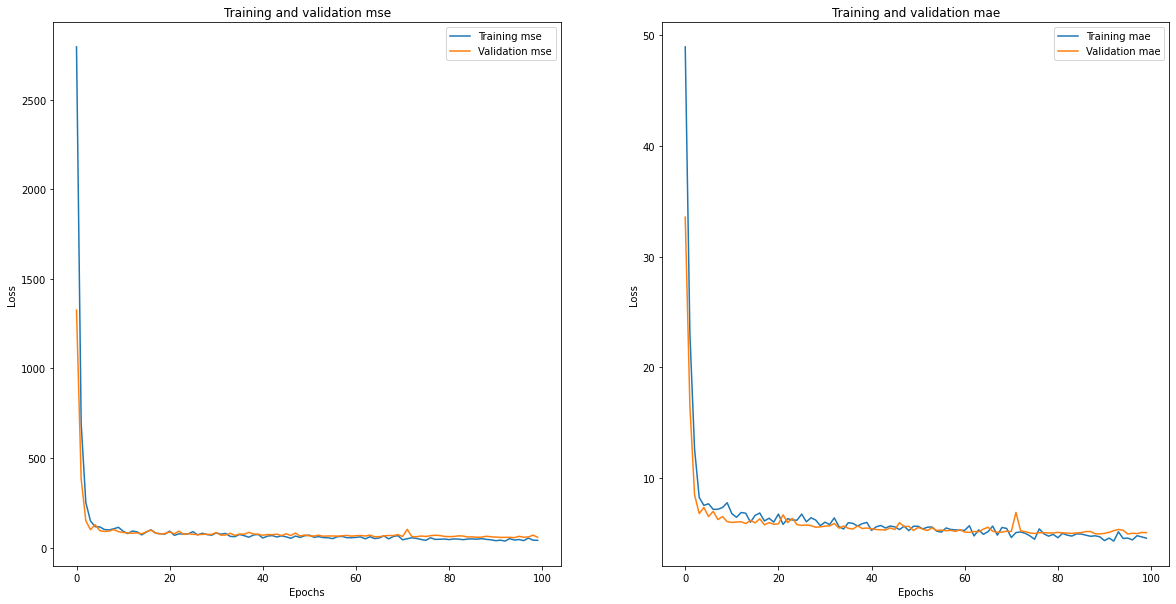

Mean Mae Score 4.211283206939697
Test mse Score: 42.967162132263184
Test_mae_Score 4.5189796686172485


In [51]:
k = 4
num_val_samples = len(train_data) //k 
num_epochs = 100
all_scores = []
all_mae_histories = []
test_maes=[]
test_mses=[]
print("number of validation samples:", num_val_samples)
print("number of training samples:", len(train_data))

for i in range(k):
    print('processing fold #', i)
    print('-------------------------------------------------------------------------------------')
    print('-------------------------------------------------------------------------------------')
    #preparing validation data from partition k 
    val_data = train_data[i *num_val_samples:(i+1)*num_val_samples]
    val_target = train_targets[i*num_val_samples:(i+1) *num_val_samples]
    #preparing the training data from all other partitions 
    partial_train_data = np.concatenate([train_data[:i*num_val_samples], train_data[(i+1)*num_val_samples:]], axis = 0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i+1)*num_val_samples:]],axis = 0)
    model = keras.Sequential()
    model.add(keras.layers.Dense(128, activation = 'relu', input_shape=(train_data.shape[1],)))
    model.add(keras.layers.Dropout(0.01))
    model.add(keras.layers.Dense(64,activation = 'relu'))
    model.add(keras.layers.Dropout(0.01))
    model.add(keras.layers.Dense(1))
    model.compile(optimizer=keras.optimizers.RMSprop(lr = 0.0001), loss = 'mse', metrics =['mae'])
    history = model.fit(partial_train_data, partial_train_targets, epochs = num_epochs, batch_size =16
                        ,validation_data=(val_data,val_target),verbose = 0)
    val_mse, val_mae = model.evaluate(val_data, val_target, verbose=0)
    all_scores.append(val_mae)
    
    test_mse,test_mae=model.evaluate(test_data, test_targets)
    test_mses.append(test_mse)
    test_maes.append(test_mae)


plot(history.history)
print("Mean Mae Score",np.mean(all_scores))
    
#test_mse_score , test_mae_score = model.evaluate(test_data, test_targets)
print("Test mse Score:", np.mean(test_mses))
print("Test_mae_Score", np.mean(test_maes))

### adding more layers along with droput layers

number of validation samples: 101
number of training samples: 404
processing fold # 0
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
4/4 [==============================] - 0s 694us/step - loss: 60.8829 - mae: 5.9500
processing fold # 1
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
4/4 [==============================] - 0s 647us/step - loss: 59.9943 - mae: 5.6552
processing fold # 2
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
4/4 [==============================] - 0s 744us/step - loss: 60.8599 - mae: 5.6703
processing fold # 3
-------------------------------------------------------------------------------------
---

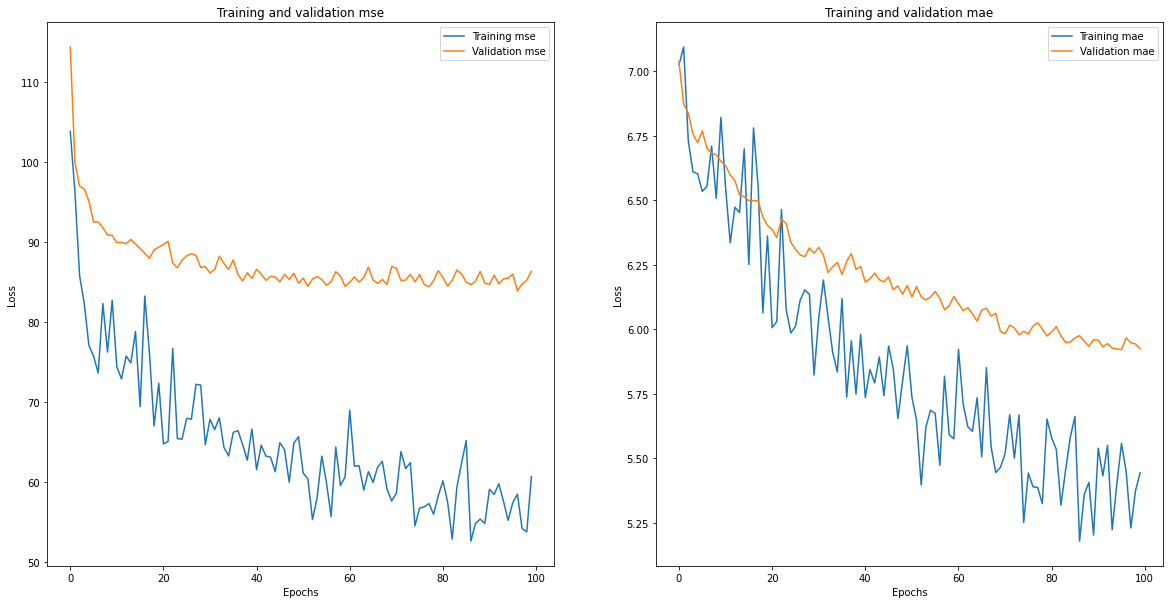

Mean Mae Score 5.361140608787537
Test mse Score: 60.814998626708984
Test_mae_Score 5.732998013496399


In [53]:
k = 4
num_val_samples = len(train_data) //k 
num_epochs = 100
all_scores = []
all_mae_histories = []
test_maes=[]
test_mses=[]
print("number of validation samples:", num_val_samples)
print("number of training samples:", len(train_data))

for i in range(k):
    print('processing fold #', i)
    print('-------------------------------------------------------------------------------------')
    print('-------------------------------------------------------------------------------------')
    #preparing validation data from partition k 
    val_data = train_data[i *num_val_samples:(i+1)*num_val_samples]
    val_target = train_targets[i*num_val_samples:(i+1) *num_val_samples]
    #preparing the training data from all other partitions 
    partial_train_data = np.concatenate([train_data[:i*num_val_samples], train_data[(i+1)*num_val_samples:]], axis = 0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i+1)*num_val_samples:]],axis = 0)
    model = keras.Sequential()
    model.add(keras.layers.Dense(128, activation = 'relu', input_shape=(train_data.shape[1],)))
    model.add(keras.layers.Dropout(0.01))
    model.add(keras.layers.Dense(64,activation = 'relu'))
    model.add(keras.layers.Dropout(0.01))
    model.add(keras.layers.Dense(128,activation ='relu'))
    model.add(keras.layers.Dropout(0.01))
    model.add(keras.layers.Dense(128,activation ='relu'))
    model.add(keras.layers.Dropout(0.01))
    model.add(keras.layers.Dense(1))
    model.compile(optimizer=keras.optimizers.Adam(lr = 0.00001), loss = 'mse', metrics =['mae'])
    history = model.fit(partial_train_data, partial_train_targets, epochs = num_epochs, batch_size =16
                        ,validation_data=(val_data,val_target),verbose = 0)
    val_mse, val_mae = model.evaluate(val_data, val_target, verbose=0)
    all_scores.append(val_mae)
    
    test_mse,test_mae=model.evaluate(test_data, test_targets)
    test_mses.append(test_mse)
    test_maes.append(test_mae)


plot(history.history)
print("Mean Mae Score",np.mean(all_scores))
    
#test_mse_score , test_mae_score = model.evaluate(test_data, test_targets)
print("Test mse Score:", np.mean(test_mses))
print("Test_mae_Score", np.mean(test_maes))